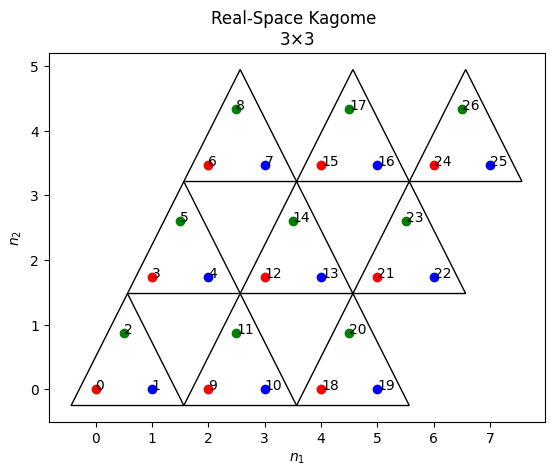

In [1]:
import sys
sys.path.insert(0,'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Kagome')
from Real_Kagome_Lattice_v2 import *

In [3]:
# Algorithm to find bound-to-bound hoppings
atom_index=0
atom_site=sites[atom_index] # [i1, i2, "0-1-2"]=[i1, i2, "A-B-C"]
print(atom_index,". Atom Site:",atom_site)

print("Neighborhoods:")
for delta in NN[atom_site[2]]: #All possibly hoppings to neighborhods for each type of atoms NN[2]
    neighbor_site = np.array(atom_site)+np.array(delta)
    neighbor_site[0] = neighbor_site[0]%l1
    neighbor_site[1] = neighbor_site[1]%l2    
    neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
    print("Delta:",delta, ", Neighbor Site",neighbor_site, ", Neighbor No:",neighbor_no)
    
print("Just bound-to-bound neighborhoods")
for delta in NN[atom_site[2]]:
    neighbor_site = np.array(atom_site)+np.array(delta)
    neighbor_site[0] = neighbor_site[0]%l1
    neighbor_site[1] = neighbor_site[1]%l2    
    neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
    if atom_site[0]+(l1-1)==neighbor_site[0] or atom_site[0]-(l1-1)==neighbor_site[0] or atom_site[1]+(l2-1)==neighbor_site[1] or atom_site[1]-(l2-1)==neighbor_site[1]: 
        print("Neighbor Site:",neighbor_site, ", Neighbor No:",neighbor_no)

0 . Atom Site: [0, 0, 0]
Neighborhoods:
Delta: (0, 0, 1) , Neighbor Site [0 0 1] , Neighbor No: 1
Delta: (0, 0, 2) , Neighbor Site [0 0 2] , Neighbor No: 2
Delta: (-1, 0, 1) , Neighbor Site [2 0 1] , Neighbor No: 19
Delta: (0, -1, 2) , Neighbor Site [0 2 2] , Neighbor No: 8
Delta: (-1, 0, 2) , Neighbor Site [2 0 2] , Neighbor No: 20
Delta: (-1, 1, 1) , Neighbor Site [2 1 1] , Neighbor No: 22
Delta: (0, -1, 1) , Neighbor Site [0 2 1] , Neighbor No: 7
Delta: (1, -1, 2) , Neighbor Site [1 2 2] , Neighbor No: 17
Just bound-to-bound neighborhoods
Neighbor Site: [2 0 1] , Neighbor No: 19
Neighbor Site: [0 2 2] , Neighbor No: 8
Neighbor Site: [2 0 2] , Neighbor No: 20
Neighbor Site: [2 1 1] , Neighbor No: 22
Neighbor Site: [0 2 1] , Neighbor No: 7
Neighbor Site: [1 2 2] , Neighbor No: 17


In [4]:
H = np.zeros([N,N],dtype=complex)
def H_Theta(theta_1, theta_2):
    for atom_no in range(N):

        # check the algorithm for spesific atom_no 
        atom_site=sites[atom_no]
        for i_delta, delta in enumerate(NN[atom_site[2]]):
            neighbor_site = np.array(atom_site)+np.array(delta)
            neighbor_site[0] = neighbor_site[0]%l1
            neighbor_site[1] = neighbor_site[1]%l2    
            neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
            # Bound-to-bound Condition
            # i2 ekseninden i1 eksenine ve tam tersi durumda atlamalar var mı?
            if atom_site[0]+(l1-1)==neighbor_site[0]:
#                 print(atom_no,"->",neighbor_no,"Direction of +i1")
                twist_1=np.exp(1j*theta_1)
            elif atom_site[0]-(l1-1)==neighbor_site[0]:
#                 print(atom_no,"->",neighbor_no,"Direction of -i1")
                twist_1=np.exp(-1j*theta_1)
            elif atom_site[1]+(l2-1)==neighbor_site[1]:
#                 print(atom_no,"->",neighbor_no,"Direction of +i2")
                twist_2=np.exp(1j*theta_2)
            elif atom_site[1]-(l2-1)==neighbor_site[1]:
#                 print(atom_no,"->",neighbor_no,"Direction of -i2")
                twist_2=np.exp(-1j*theta_2)
            # No bound-to-bound
            else:
                twist_1=twist_2=1
#                 print(atom_no,"->",neighbor_no, "-")
        # end-check
            
            H[neighbor_no,atom_no]=twist_1*twist_2*hopps[atom_site[2]][i_delta]
    return H

In [40]:
# Reciprocal Vectors
b1x = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * a2_vec[1]
b1y = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * -a2_vec[0]
b2x = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * -a1_vec[1]
b2y = (2*np.pi/(a1_vec[0]*a2_vec[1]-a1_vec[1]*a2_vec[0])) * a1_vec[0]
b11=np.array([b1x,b1y]) 
b22=np.array([b2x,b2y]) 

# Twisted Angle Space Mesh = FBZ Mesh
theta_size = 5
q1_list = np.arange(0,theta_size) / theta_size
q2_list =  np.arange(0,theta_size) / theta_size
T = []
for q1 in q1_list:
    for q2 in q2_list:
        T.append(q1*b11+q2*b22)
T = np.array(T)
theta_1 = T[:,0];theta_2=T[:,1]

#theta_size=10
d1 = 0.62831853 #Delta \theta_1 
d2 = 0.72551975 #Delta \theta_2

In [46]:
# Bizim her zaman üç bandımız var ve her boyutta üç adet chern sayımız çıkacak.
# 16'şar defa (l1=l2=4) enerjilerinin dejenere çıkması lazım. Çünkü o multiplerden chern hesaplayacağız.
w1, v1 = np.linalg.eig(H_Theta(theta_1[5], theta_2[7]))
print(np.sort(w1))

#IMAGINER ENERJİLER ???? HAMILTONIAN YANLIŞ? 

[-2.80683623+3.16767768e-04j -2.78390663+1.70668113e-02j
 -2.77297921-2.16581260e-01j -2.76953841-1.38517443e-03j
 -2.76444015-6.27795023e-02j -2.75922379-1.78614852e-03j
 -2.75711577-1.25142309e-04j -2.72701307+1.50180544e-02j
 -2.54306579+2.98807979e-01j -0.38212738+1.28891862e-03j
 -0.29458821-1.20636248e-03j  0.06017272-3.32729935e-02j
  0.12059208-1.13976309e-02j  0.26363961+3.55762780e-03j
  0.31436835-3.33399404e-02j  0.42597254+5.05640239e-02j
  0.50121767+2.19864750e-02j  1.05286731-1.46738056e-03j
  1.74885562-9.74194325e-03j  2.32895403+4.50774766e-02j
  2.34569802+1.23812588e-02j  2.40484068-2.08232870e-01j
  2.46986268-6.86299231e-03j  2.539511  +7.74464045e-02j
  2.58211973+1.73228711e-02j  3.08980314-3.17495688e-02j
  3.11235945+5.90942414e-02j]


In [45]:
# CHERN NUMBERS CALCULATION

#0-16,16-32,32-48 (Slicing) (l1=l2=4)
n1=0;n2=16
S=0
for t_1 in range(0, len(theta_1)):
    for t_2 in range(0, len(theta_2)):
        
        w1, v1 = np.linalg.eig(H_Theta(theta_1[t_1], theta_2[t_2]))
        idx1 = np.argsort(w1)
        v1 = v1[:,idx1]
        v1 = v1[:,n1:n2]
        
        w2, v2 = np.linalg.eig(H_Theta(theta_1[t_1]+d1, theta_2[t_2]))
        idx2 = np.argsort(w2)
        v2 = v2[:,idx2]
        v2 = v2[:,n1:n2]
        
        w3, v3 = np.linalg.eig(H_Theta(theta_1[t_1], theta_2[t_2]+d2))
        idx3 = np.argsort(w3)
        v3 = v3[:,idx3]
        v3 = v3[:,n1:n2]
        
        w4, v4 = np.linalg.eig(H_Theta(theta_1[t_1]+d1, theta_2[t_2]+d2))
        idx4 = np.argsort(w4)
        v4 = v4[:,idx4]
        v4 = v4[:,n1:n2]
        
        U1 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v1)), v2)) #U_x
        U1 = U1 / np.absolute(U1)
        
        U2 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v2)), v4)) #U_y dx
        U2 = U2 / np.absolute(U2)
        
        U3 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v3)), v4)) #U_x dy
        U3 = U3 / np.absolute(U3)
        
        U4 = np.linalg.det(np.matmul(np.conjugate(np.transpose(v1)), v3)) #U_y
        U4 = U4 / np.absolute(U4)
        
        F = np.log(U1*U2*1/U3*1/U4)
        S = S+F

C = 1/(2*np.pi*1j)*S
print(C)

#CHERN IMAGINER PART??

(-6.701337996683774+3.691374786103465e-17j)
